In [2]:
import sqlite3
%load_ext memory_profiler

conn = sqlite3.connect('../blood_donation.db')

def measure_query(query):
    # Measure the time it takes to execute the query
    time = %time pd.read_sql_query(query, conn)
    # Measure the memory usage of the query
    mem = %memit -o pd.read_sql_query(query, conn)
    return {'time': time, 'memory': mem}

# Example usage:
query = "SELECT * FROM MedicalConditions"
result = measure_query(query)
print(result)

CPU times: total: 0 ns
Wall time: 3.18 ms
peak memory: 105.12 MiB, increment: 0.15 MiB
{'time':    MedicalConditionID                       Name
0                   1               Aids and HIV
1                   2                     Asthma
2                   3                 Babesiosis
3                   4  Blood disease or disorder
4                   5          Caesarean Section
5                   6                   Diabetes
6                   7                   Epilepsy
7                   8                       Fits
8                   9          Haemoglobin level
9                  10                   Syphilis, 'memory': <memory_profiler.MemitResult object at 0x0000025AC6F84130>}


In [3]:
query2 = "SELECT * FROM Slots"
result2 = measure_query(query2)
print(result2)

CPU times: total: 0 ns
Wall time: 3.99 ms
peak memory: 105.37 MiB, increment: 0.00 MiB
{'time':    SlotID StartTime   EndTime  Max_Bookings  Booked_Count DonationCenterID
0       1  09:00:00  10:00:00             5             0             None
1       2  10:00:00  11:00:00             5             0             None
2       3  11:00:00  12:00:00             5             0             None
3       4  12:00:00  13:00:00             5             0             None
4       5  13:00:00  14:00:00             5             0             None
5       6  14:00:00  15:00:00             5             0             None
6       7  15:00:00  16:00:00             5             0             None
7       8  16:00:00  17:00:00             5             0             None, 'memory': <memory_profiler.MemitResult object at 0x0000025AC710F160>}


In [4]:
query3 = "SELECT * FROM DonationCenter"
result3 = measure_query(query3)
print(result3)

CPU times: total: 0 ns
Wall time: 1.08 ms
peak memory: 105.37 MiB, increment: 0.00 MiB
{'time':    DonationCenterID                     Name  \
0                 1         BloodBank@Outram   
1                 2     BloodBank@DhobyGhaut   
2                 3      BloodBank@Woodlands   
3                 4  BloodBank@WestgateTower   

                                             Address  
0  Health Sciences Authority(Opposite Outram Park...  
1  Dhoby Ghaut MRT Station Dhoby Xchange (Near Ex...  
2  Woodlands Civic Centre(Opposite Causeway Point...  
3  Westgate Tower(Linked to Jurong East MRT Stati...  , 'memory': <memory_profiler.MemitResult object at 0x0000025AB6AFB520>}


In [5]:
query4 = "SELECT Appointment.Date, Slots.StartTime, Slots.EndTime, DonationCenter.Name FROM Appointment INNER JOIN Slots ON Appointment.SlotID = Slots.SlotID INNER JOIN DonationCenter ON Appointment.DonationCenterID = DonationCenter.DonationCenterID WHERE Slots.Booked_Count < Slots.Max_Bookings"
result4 = measure_query(query4)
print(result4)

CPU times: total: 0 ns
Wall time: 2.06 ms
peak memory: 105.41 MiB, increment: 0.00 MiB
{'time':          Date StartTime   EndTime                 Name
0  2023-04-12  14:00:00  15:00:00  BloodBank@Woodlands, 'memory': <memory_profiler.MemitResult object at 0x0000025AC71D9270>}


In [6]:
query5 = "SELECT * FROM Staff"
result5 = measure_query(query5)
print(result5)

CPU times: total: 0 ns
Wall time: 2.86 ms
peak memory: 105.39 MiB, increment: 0.00 MiB
{'time':    StaffID      Name             Email   Password Role
0        1  ZhengWei  staff1@gmail.com  password1    2
1        2      John  staff2@gmail.com  password2    2
2        3      Mary  staff3@gmail.com  password3    2, 'memory': <memory_profiler.MemitResult object at 0x0000025AB6C66AA0>}


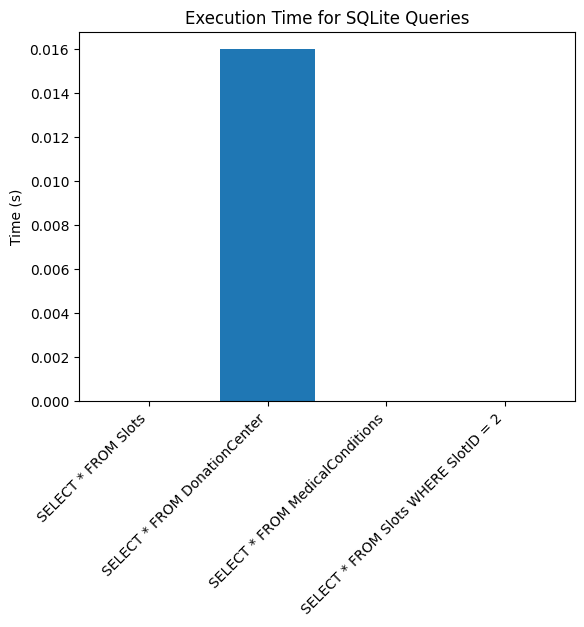

In [14]:
#Graph visualization
import time
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

def measure_query_2(query):
    start_time = time.monotonic()
    conn = sqlite3.connect('../blood_donation.db')
    cursor = conn.cursor()
    cursor.execute(query)
    result = cursor.fetchall()
    columns = [col[0] for col in cursor.description]
    df = pd.DataFrame(result, columns=columns)
    conn.close()
    end_time = time.monotonic()
    elapsed_time = end_time - start_time
    return {'query': query, 'time': elapsed_time, 'result': df}

queries = ['SELECT * FROM Slots', 'SELECT * FROM DonationCenter', 'SELECT * FROM MedicalConditions', 'SELECT * FROM Slots WHERE SlotID = 2']
results = [measure_query_2(q) for q in queries]
times = []
for r in results:
    if r['result'].empty:
        times.append(0)
    else:
        times.append(r['time'])

plt.bar(range(len(queries)), times)
plt.xticks(range(len(queries)), queries, rotation=45, ha='right')
plt.ylabel('Time (s)')
plt.title('Execution Time for SQLite Queries')
plt.show()
